In [55]:
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [56]:
# pip install yfinance

In [57]:
#Get the stock quote
# df=web.DataReader('^BSESN',data_source='yahoo',start='2014-01-01',end='2022-06-28')
df = yf.download('AAPL', start = '2014-01-01', end='2023-05-01')
#Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388981,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007013,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099752,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084988,258529600
...,...,...,...,...,...,...
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800


In [58]:
#getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2014-01-02 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2347 non-null   float64
 1   High       2347 non-null   float64
 2   Low        2347 non-null   float64
 3   Close      2347 non-null   float64
 4   Adj Close  2347 non-null   float64
 5   Volume     2347 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 128.4 KB


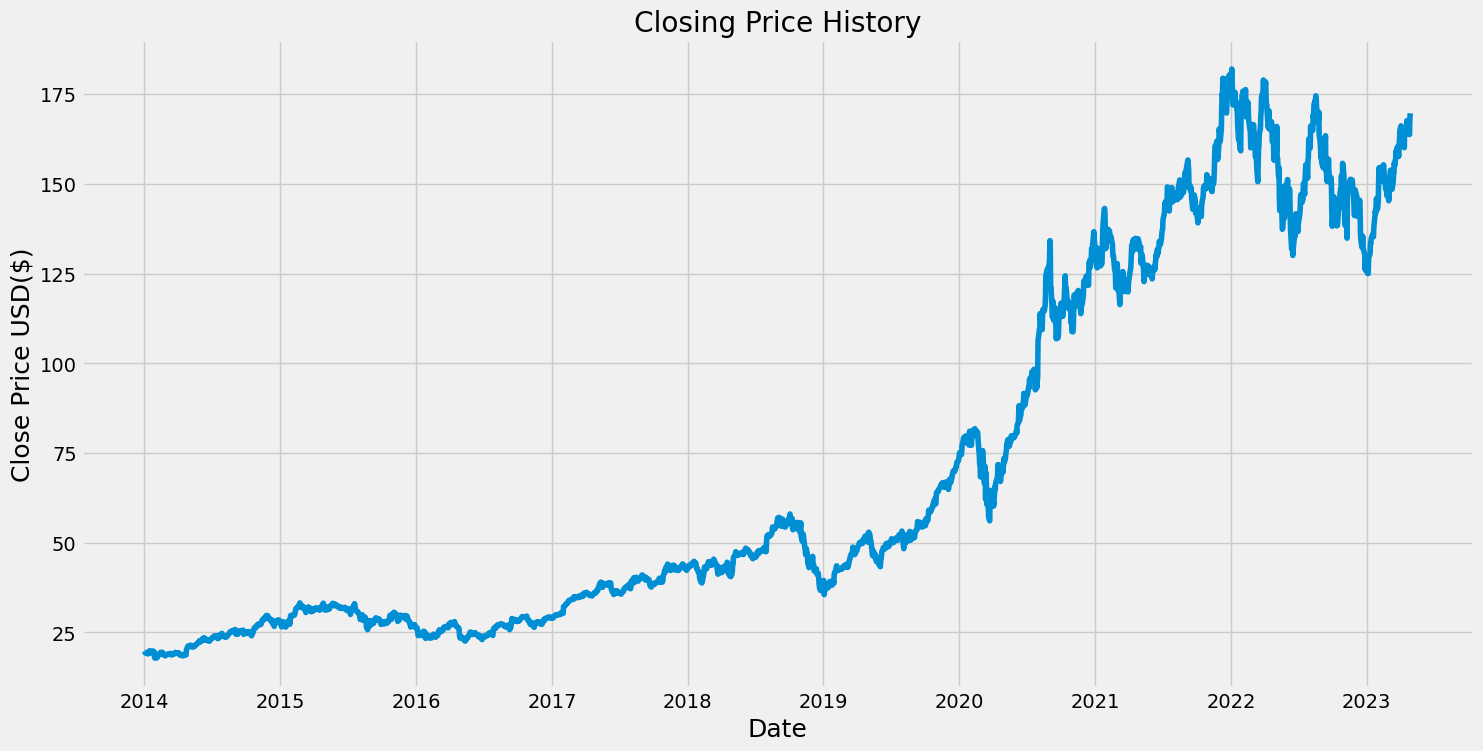

In [59]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [60]:
#Create the new dataframe with only the close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

1878

In [61]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01160666],
       [0.00896335],
       [0.00960514],
       ...,
       [0.88882845],
       [0.91715441],
       [0.92489066]])

In [62]:
#Create the taining data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01072339, 0.01125423, 0.01227021,
       0.01007071, 0.01103448, 0.00146199, 0.00021103, 0.        ,
       0.00017839, 0.00038072, 0.00196018, 0.00278691, 0.0027695 ,
       0.00432938, 0.00635484, 0.00787122, 0.0078625 , 0.00971392,
       0.00961818, 0.01005331, 0.00817797, 0.00682476, 0.00554117,
       0.00604155, 0.00484717, 0.00382248, 0.00606767, 0.00575656,
       0.00608725, 0.00684434, 0.00708801, 0.00673774, 0.0066703 ,
       0.00677473, 0.00789949, 0.00801262, 0.00671599, 0.00541935,
       0.00586534, 0.00687915, 0.0068487 , 0.00629175, 0.00719896,
       0.00857392, 0.00983575, 0.00870228, 0.00819754, 0.00806701])]
[0.00804091068532381]



In [63]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [64]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1818, 60, 1)

In [65]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [66]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [67]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1818/1818 [==============================] - 40s 20ms/step - loss: 0.0011


In [68]:
#Create the testing dataset
#Create a new array containing scaled values from the index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#Create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: ,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])  

In [69]:
#Convert the data to a numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [70]:
#Get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

15/15 [==============================] - 1s 18ms/step


In [71]:
#Get the root mean square erro(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.9078586635304922

C:\Users\VINIT\AppData\Local\Temp\ipykernel_17532\4069016047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


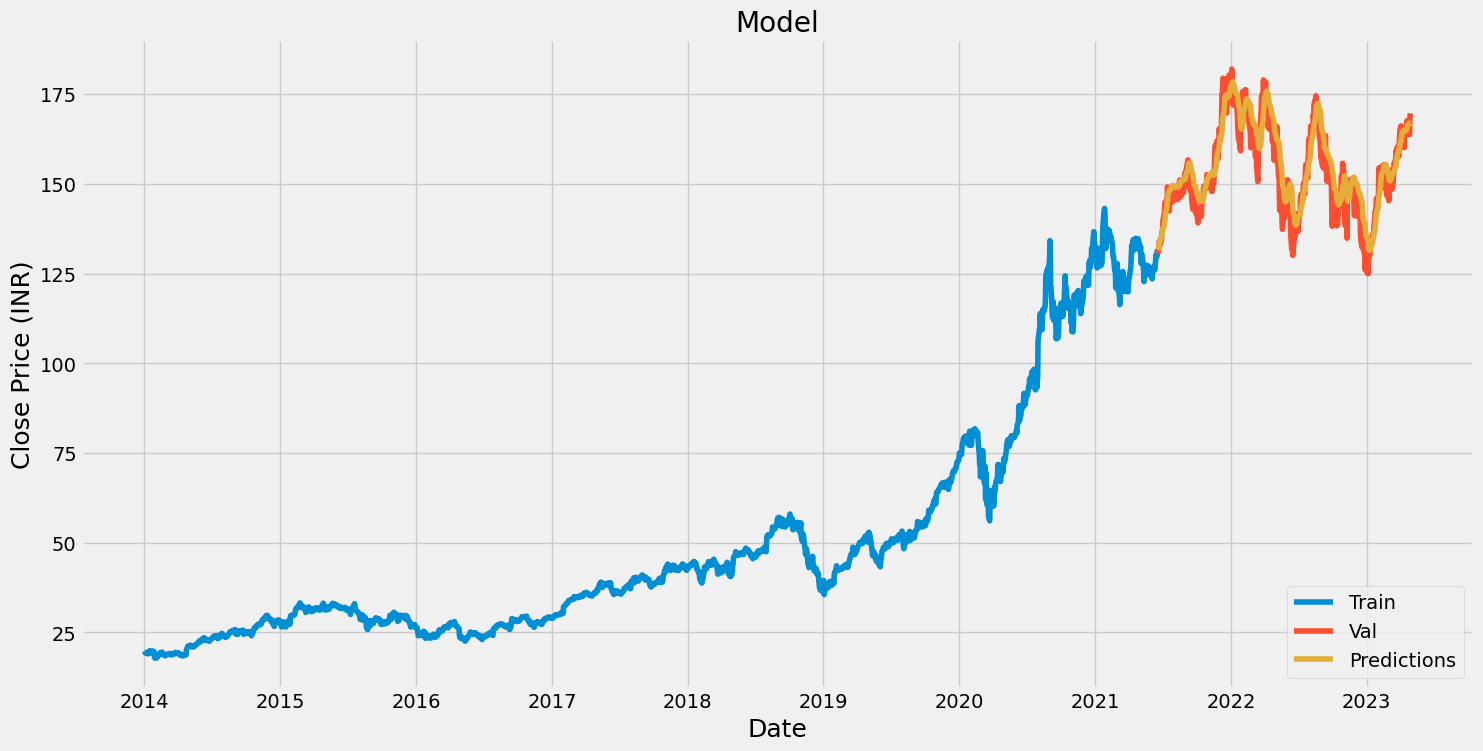

In [72]:
#Plot the data
train =data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [73]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-18,130.460007,131.650375
2021-06-21,132.300003,132.211304
2021-06-22,133.979996,132.817215
2021-06-23,133.699997,133.535004
2021-06-24,133.410004,134.229187
...,...,...
2023-04-24,165.330002,166.793289
2023-04-25,163.770004,166.943756
2023-04-26,163.759995,166.891098


In [74]:
 #Get the quote 
apple_quote= yf.download('AAPL', start = '2014-01-01', end='2023-05-01')
#Create the new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled= scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test dataset to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 33ms/step
[[167.34799]]


In [75]:
apple_quote2= yf.download('AAPL', start = '2023-04-01', end='2023-05-02')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-04-03    166.169998
2023-04-04    165.630005
2023-04-05    163.759995
2023-04-06    164.660004
2023-04-10    162.029999
2023-04-11    160.800003
2023-04-12    160.100006
2023-04-13    165.559998
2023-04-14    165.210007
2023-04-17    165.229996
2023-04-18    166.470001
2023-04-19    167.630005
2023-04-20    166.649994
2023-04-21    165.020004
2023-04-24    165.330002
2023-04-25    163.770004
2023-04-26    163.759995
2023-04-27    168.410004
2023-04-28    169.679993
2023-05-01    169.589996
Name: Close, dtype: float64
